# Topic Modeling

In [1]:
import sys
sys.version

'3.10.5 (main, Jun  6 2022, 18:49:26) [GCC 12.1.0]'

## Building a topic model 

In [2]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import gensim
from gensim import corpora, models

corpus = corpora.BleiCorpus("./data/ap/ap.dat", "./data/ap/vocab.txt")

In [4]:
model = models.ldamodel.LdaModel(
    corpus,
    num_topics=100,
    id2word=corpus.id2word
)

In [5]:
doc = corpus.docbyoffset(0)
topics = model[doc]
print(topics)

[(10, 0.013225546), (28, 0.07190704), (34, 0.013559391), (43, 0.022816341), (47, 0.20257895), (48, 0.099299975), (49, 0.021538753), (54, 0.021581963), (64, 0.18492891), (76, 0.08258188), (84, 0.19908002), (86, 0.029858237), (99, 0.016222036)]


In [6]:
import matplotlib.pyplot as plt
import numpy as np

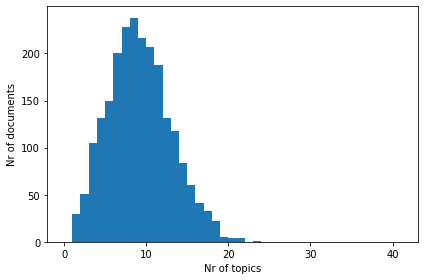

In [7]:
num_topics_used = [len(model[doc]) for doc in corpus]
fig,ax = plt.subplots()
ax.hist(num_topics_used, np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
fig.tight_layout()
fig.savefig('Figure_04_01.png')

In [8]:
ALPHA = 1.0

model1 = models.ldamodel.LdaModel(
    corpus, 
    num_topics=100,
    id2word=corpus.id2word, 
    alpha=ALPHA
)

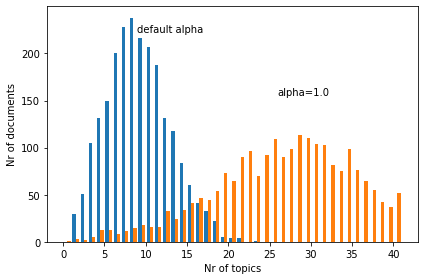

In [9]:
num_topics_used1 = [len(model1[doc]) for doc in corpus]

fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel("Nr of documents")
ax.set_xlabel("Nr of topics")

# The coordinates below were fit by trial and error to look good
ax.text(9, 223, r"default alpha")
ax.text(26, 156, "alpha=1.0")
fig.tight_layout()
fig.savefig("Figure_04_02.png")

## Comparing documents by topic 

In [10]:
from gensim import matutils 
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics) 

In [11]:
from scipy.spatial import distance 
distances = distance.squareform(distance.pdist(topics)) 

In [12]:
 for ti in range(len(topics)): 
     distances[ti,ti] = np.inf 

In [13]:
def closest_to(doc_id): 
    return distances[doc_id].argmin() 

In [14]:
closest_to(1)

14